Formal Definition of Simplicial Complex:

A tuple $(V, S)$ where $V$ is a finite set of vertices and $S$ is a set of non-empty subsets of $V$ where

\begin{align}
p \in V &\implies \{ p \} \in S \\
\sigma \in S, \tau \subseteq \sigma &\implies \tau \in S
\end{align}

So, let's look at the below simplicial complex:

![simplicial complex](simplicial_complex.jpg)
https://commons.wikimedia.org/wiki/File:Tetrahedron.jpg

We can see that the tetrahedron can be represented as

$V = \{0,1,2,3\}$ and
$S = \{ \{ 0 \}, \{1 \}, \{2 \}, \{3\}, \{0, 1\}, \{0, 2\}, \{0, 3\}, \{1, 2 \}, \{1, 3 \}, \{2, 3 \}, \{0, 1, 2 \}, \{0, 1, 3\}, \{0, 2, 3\}, \{1, 2, 3\}, \{0, 1, 2, 3 \} \}$.

Each element $\sigma \in S$ is called a *simplex* or *face* of a simplicial complex. Therefore, the simplex above can be considered a 3-simplex. 

We can look at a face of a simplex $\sigma$ as a subset of the vertices of $\sigma$. A *facet* is a face of maximal dimension and if $\sigma$ is a face of $\tau$, $\tau$ is a coface of $\sigma$. Lastly, the subset of simples of all the cofaces of $\sigma$ is the start of $\sigma$. We need to also look at $Lk(\sigma)$, which is the set of faces that do not share a vertex with $\sigma$ essentially.

However, representing these simplicial complexes as sets of sets leads to very inefficient manipulations. 

So, instead we use a simplex tree. This is a **trie**, which represents all of the simplices as strings in the trie.

Each simplex of the simplicial complex *K* is a word on the alphabet. The *j*-simplex is represented with length *j + 1*. The last label of the word representation of a simplex $\sigma$ is called *last($\sigma$)*. 

The simplex tree satisfies 3 properties:

1. The nodes of the simplex tree are in bijection with the simplices of the complex.
2. Each node of the tree stores the label of the vertex.
3. The vertex whose labels are encountered from the root to a node are associated with a simplex $\sigma$ are the vertices of $\sigma$. Labels are sorted in increasing order and each label appears no more than once.

The children of the root are the *top nodes*. Nodes with the same parent are sibling nodes. 

$D_m$ is the maximal number of operations needed to perform a search, an insertion or a removal in a dictionary of maximal size $\deg(T)$.

In [2]:
%matplotlib inline
from SimplexTree import MeshSimplexTree
import numpy as np

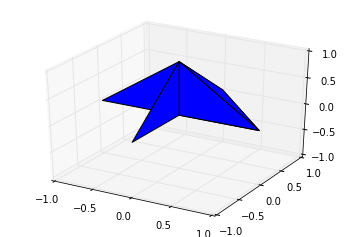

In [2]:

t = MeshSimplexTree()
t.add_simplex((0, 1, 2, 3),((1, 0, 0), (0, 1, 0), (0, 0, 1), (0, 0, 0)))
t.add_simplex((2, 3, 4), (0, 0, (-1, 0, 0)))
t.add_simplex((2, 3, 5), (0, 0, (0, -1, 0)))
fig, ax = t.plot()

In [8]:
for a in t:
    print(a)

(0,)
(0, 2)
(0, 2, 3)
(0, 3)
(2,)
(2, 3)
(2, 3, 5)
(2, 5)
(3,)
(3, 5)
(5,)


(<matplotlib.figure.Figure at 0x7f0a9fd32c88>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f0a9f537588>)

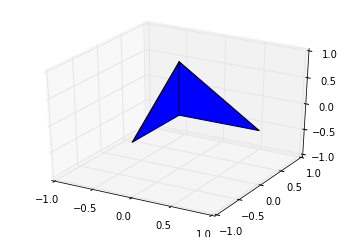

In [7]:
t.edge_contract(3, 4)
t.plot()

In [1]:
%matplotlib inline
from SimplexTree import MeshSimplexTree
import matplotlib.pyplot as plt
import numpy as np
from stl.mesh import Mesh
mesh = Mesh.from_file('/home/ryan/Thesis/models/Dalek.stl')
t = MeshSimplexTree.from_mesh(mesh)

In [2]:
t.mesh_simplify(500)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


(-5.0, 15.0, -5.0, 15.0)

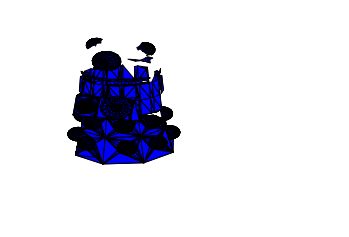

In [4]:
fig, ax = t.plot(.7)
ax.view_init(25, -70)
plt.axis("off")

In [5]:
t.mesh_simplify(500)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


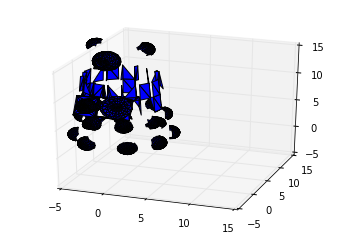

In [7]:
fig, ax = t.plot(.7)
ax.view_init(25, -70)

In [2]:
import matplotlib.pyplot as plt
from pytrie import Trie
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

class SimplexTree(Trie):
    
    def __init__(self):
        super().__init__()
        self.vertices = set()
    
    @classmethod
    def from_mesh(cls, mesh : Mesh):
        tree = cls()
        vlocs = {}
        index = 0
        for p in mesh.points.reshape(-1, 3):
            if frozenset(p) not in vlocs:
                vlocs[frozenset(p)] = index
                index += 1
        
        for ps in mesh.points:
            x, y, z = ps.reshape(-1, 3)
            d = list((vlocs[frozenset(x)], vlocs[frozenset(y)], vlocs[frozenset(z)]))
            tree.add_simplex(d, locs=(x, y, z))
        
        return tree
        
    '''
    O(2^j D_m) where we insert a j-simplex with D_m = O(1)
    ''' 
    def add_simplex(self, simplex : set, locs=None, root=None):
        if len(simplex) == 0:
            return 
        
        if root:
            for i, l in enumerate(simplex):
                self[root + (l,)] = 0
                self.add_simplex(simplex[i+1:], root=(root + (l,)))
        else:
            for i, l in enumerate(simplex):
                self.vertices.add(l)
                if (l,) not in self:
                    self[(l,)] = locs[i]
                self.add_simplex(simplex[i+1:], root=(l,))
    
    def simplify(self, num : int):
        so_far = 0
        while num >= so_far:
            for i in np.random.shuffle(vertices):
                for j in np.random.shuffle(vertices):
                    its = self.items((i, j))
                    if len(its) == 2:
                        self.collapse(i, j)
                        so_far += 1

            break
        v1, v2 = min(v1, v2), max(v1, v2)  

    def edge_contract(self, v1, v2):
        v1, v2 = min(v1, ttv2), max(v1, v2)
        
        if (v1, v2) not in self:
            return False
        
    def plot(self, scale=1):
        fig = plt.figure()
        axes = fig.add_subplot(111, projection='3d')
        
        points = []
        lines = []
        triangles = []
        for k in self.iterkeys():
            if len(k) == 1:
                (x, ) = k
                points.append(self[(x,)])
            elif len(k) == 2:
                x, y = k
                lines.append([self[(x, )], self[(y, )]])
            elif len(k) == 3:
                x, y, z = k
                triangles.append([self[(x, )], self[(y, )], self[z, ]])
        
        triangles = np.array(triangles)
        axes.add_collection3d(Poly3DCollection(triangles))
        scale = triangles.flatten(-1) * scale
        axes.auto_scale_xyz(scale, scale, scale)
        return fig, axes

/home/ryan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:91: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


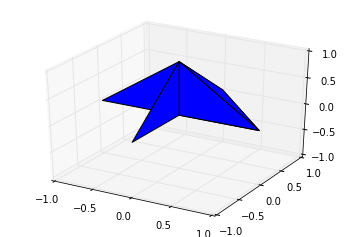

In [4]:
t = SimplexTree()
t.add_simplex((0, 1, 2, 3),((1, 0, 0), (0, 1, 0), (0, 0, 1), (0, 0, 0)))
t.add_simplex((2, 3, 4), (0, 0, (-1, 0, 0)))
t.add_simplex((2, 3, 5), (0, 0, (0, -1, 0)))
fig, ax = t.plot()

/home/ryan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:85: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


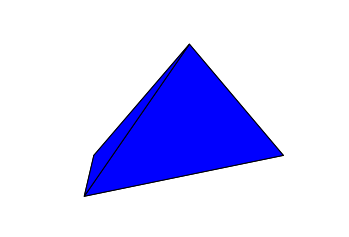

In [7]:
t = SimplexTree()
t.add_simplex((0, 1, 2, 3), locs=((1, 0, 0), (0, 1, 0), (.5, .5, 1), (0, 0, 0)))
fig, ax = t.plot(.8)
ax.view_init(15, 0)
plt.axis("off")
fig.savefig("pres2/tetrahedron.png")
plt.show()

CPU times: user 227 ms, sys: 2.98 ms, total: 230 ms
Wall time: 232 ms


/home/ryan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:85: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


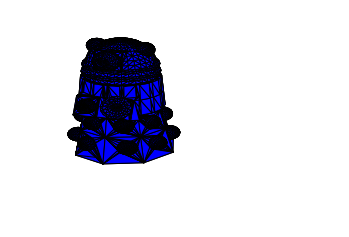

In [3]:
mesh = Mesh.from_file('models/Dalek.stl')
t = SimplexTree.from_mesh(mesh)
fig, ax = t.plot(.7)
ax.view_init(25, -70)
plt.axis("off")
plt.show()

/home/ryan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


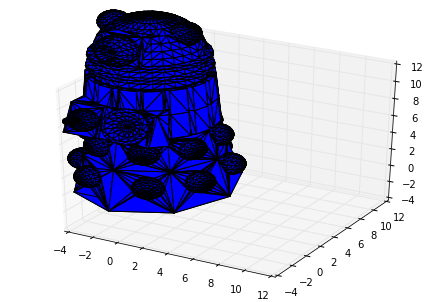

In [6]:
# Create a new plot
figure = plt.figure()
axes = Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = Mesh.from_file('models/Dalek.stl')
axes.add_collection3d(Poly3DCollection(your_mesh.vectors))
scale = your_mesh.points.flatten(-1) / 1.8
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
plt.show()